In [12]:
from typing import List, Tuple, Dict, Union
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

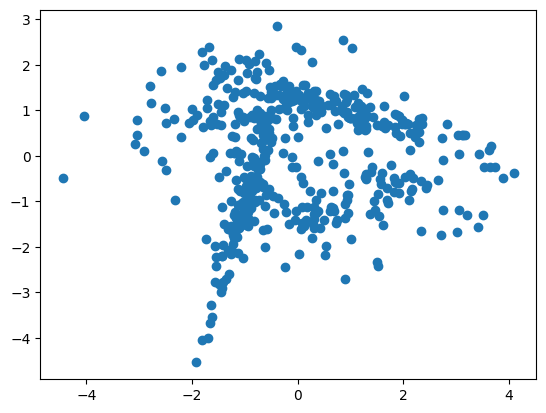

In [13]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_repeated=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:, 0], X[:, 1])

In [27]:
class DecisionTree:
    
    class Node:
        def __init__(self, 
                     value: List[Tuple[float]], 
                     left_subtree: object, 
                     right_subtree: object,
                     entropy: Tuple[int, int]):
            self.value = value
            self.left_subtree = left_subtree
            self.right_subtree = right_subtree
            self.entropy = entropy
    
    def __init__(self, max_depth:int = None) -> None:
        self.max_depth = max_depth
        
    def get_entropy(self, x, y) -> float:
        entropy = 0
        
        for cat in self.categories:
            prob = np.count_nonzero(y == cat) / len(y)
            entropy -= (prob) * np.log2(prob)
        
        return entropy
    
    def get_split_index(self, categories: List[int]):
        cat_streak = 0
        current_streak = 0
        index = 0
        
        for i in range(1, len(categories)):
            if categories[i] == categories[i-1]:
                current_streak += 1
            else:
                if cat_streak <= current_streak:
                    cat_streak = current_streak
                    index = i
                    
                current_streak = 0
        return index
        
    def build(self, X: List[Tuple[float, float]], y: List[int]) -> None:
        self.categories = set(y)
        current_entropy = self.get_entropy(X, y)
        
        if current_entropy == 0:
            return self.Node(value=X, left_subtree=None, right_subtree=None, entropy=current_entropy)
        
        split_index = self.get_split_index(y)
        
        node = self.Node(value=X, 
                    left_subtree=self.build(X[:split_index], y[:split_index]),
                    right_subtree=self.build(X[split_index:], y[split_index:]),
                    entropy=current_entropy)
        return node
        
    def predict(self, x):
        
            

In [29]:
tree = DecisionTree()
tree.build(X_test, y_test)
